In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
plt.style.use("ggplot")


In [190]:
fpath = "C:/Users/davis.pazars/Downloads/Case_study_and_LoanStats_2018Q2/LoanStats_2018Q2.csv"
raw_data = pd.read_csv(fpath, skiprows=1, low_memory=False)

data = raw_data.copy()

data = data.iloc[:-2]
data = data.drop(labels=["id", "member_id"], axis=1)

data.tail()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
130767,6800.0,6800.0,6800.0,36 months,16.01%,239.11,C,C5,Direct Service Provider Day Activity,10+ years,MORTGAGE,20000.0,Verified,Apr-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,280xx,NC,25.03,1.0,Sep-2009,0.0,15.0,NaN,7.0,0.0,3244.0,28.7%,11.0,f,5299.69,5299.69,2233.06,2233.06,1500.31,732.75,0.0,0.0,0.0,Jan-2019,250.00,Feb-2019,Jan-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,137.0,69481.0,1.0,1.0,1.0,1.0,10.0,12913.0,93.0,1.0,1.0,2000.0,64.0,11300.0,0.0,1.0,0.0,2.0,9926.0,5000.0,28.6,0.0,0.0,47.0,54.0,3.0,3.0,1.0,3.0,NaN,NaN,NaN,0.0,1.0,2.0,3.0,3.0,4.0,5.0,6.0,2.0,7.0,0.0,0.0,0.0,2.0,90.9,33.3,0.0,0.0,100125.0,16157.0,7000.0,13825.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
130768,3000.0,3000.0,3000.0,36 months,20.39%,112.09,D,D4,Cleaner,10+ years,RENT,72000.0,Not Verified,Apr-2018,Current,n,NaN,NaN,other,Other,071xx,NJ,5.87,0.0,Oct-2007,0.0,NaN,NaN,11.0,0.0,5509.0,60.5%,13.0,w,2411.29,2411.29,1005.41,1005.41,588.71,416.70,0.0,0.0,0.0,Jan-2019,112.09,Feb-2019,Jan-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,5509.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,3.0,9.0,1524.0,61.0,9100.0,0.0,0.0,1.0,9.0,501.0,836.0,81.0,0.0,0.0,NaN,125.0,4.0,4.0,0.0,14.0,NaN,8.0,NaN,0.0,5.0,10.0,5.0,7.0,0.0,11.0,13.0,10.0,11.0,0.0,0.0,0.0,3.0,100.0,60.0,0.0,0.0,9100.0,5509.0,4400.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
130769,14000.0,14000.0,13975.0,36 months,16.01%,492.27,C,C5,client analyst,10+ years,MORTGAGE,52874.0,Not Verified,Apr-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,912xx,CA,22.36

In [191]:
data = data.dropna(axis=1, how="all")
data = data.drop_duplicates()


In [192]:
# Binarize loan status

loan_status = data["loan_status"]

data["loan_status_perf"] = data["loan_status"].map(
    {
        "Current": 0,
        "Fully Paid": 0,
        "In Grace Period": 0,
        "Late (16-30 days)": 1,
        "Late (31-120 days)": 1,
        "Charged Off": 1,
        "Default": 1,
    },
)

data = data.drop(labels="loan_status", axis=1)


In [193]:
# Separate single and joint applications
joint_labels = [col for col in data.columns if "joint" in col or "sec_" in col]

data_joint = data.loc[data.application_type == "Joint App"]
data = data.loc[data.application_type != "Joint App"]


In [194]:
data_joint = data_joint.drop(labels="application_type", axis=1)
data = data.drop(labels=joint_labels + ["application_type"], axis=1)


In [195]:
settle_cols = [col for col in data.columns if "settlement" in col]
settle_data = data.loc[
    data.debt_settlement_flag == "Y", settle_cols + ["loan_status_perf"]
]

settle_data

# Settlement agreement is made when a loan is already non-performing, so this information is not relevent for predicting loan performance


,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status_perf
6680,Y,Jan-2019,ACTIVE,Jan-2019,4366.00,64.99,18.0,1
14667,Y,Jan-2019,ACTIVE,Jan-2019,8448.00,65.00,18.0,1
18158,Y,Jan-2019,ACTIVE,Jan-2019,20296.00,65.00,18.0,1
18708,Y,Dec-2018,ACTIVE,Dec-2018,4209.00,65.01,12.0,1
22814,Y,Jan-2019,BROKEN,Nov-2018,2899.00,64.99,18.0,1
...,...,...,...,...,...,...,...,...
127012,Y,Nov-2018,ACTIVE,Nov-2018,2527.00,64.99,18.0,1
127563,Y,Aug-2018,ACTIVE,Aug-2018,4027.00,65.01,18.0,1
129631,Y,Dec-2018,ACTIVE,Dec-2018,10856.89,60.00,24.0,1
130415,Y,Jan-2019,ACTIVE,Dec-2018,4454.68,45.00,24.0,1


In [196]:
data = data.drop(settle_cols, axis=1)


In [197]:
data.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,loan_status_perf
0,12000.0,12000.0,12000.0,60 months,20.39%,320.54,D,D4,Garage Man,10+ years,RENT,42000.0,Verified,Jun-2018,n,credit_card,Credit card refinancing,440xx,OH,14.46,0.0,Nov-2007,1.0,NaN,NaN,4.0,0.0,8090.0,64.7%,9.0,w,11269.75,11269.75,1896.05,1896.05,730.25,1165.80,0.0,0.0,0.0,Jan-2019,320.54,Feb-2019,Jan-2019,0.0,NaN,1.0,0.0,0.0,11968.0,1.0,1.0,0.0,1.0,24.0,3878.0,33.0,3.0,3.0,5445.0,50.0,12500.0,1.0,0.0,1.0,4.0,2992.0,4410.0,64.7,0.0,0.0,125.0,127.0,3.0,3.0,0.0,3.0,NaN,3.0,NaN,0.0,3.0,3.0,3.0,4.0,4.0,3.0,5.0,3.0,4.0,0.0,0.0,0.0,3.0,100.0,66.7,0.0,0.0,24138.0,11968.0,12500.0,11638.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,0
1,29150.0,29150.0,29150.0,60 months,20.39%,778.64,D,D4,Police Officer,10+ years,MORTGAGE,51000.0,Verified,Jun-2018,n,home_improvement,Home improvement,807xx,CO,20.82,0.0,Feb-2003,1.0,49.0,NaN,11.0,0.0,12760.0,40.4%,34.0,w,27376.13,27376.13,4605.80,4605.80,1773.87,2831.93,0.0,0.0,0.0,Jan-2019,778.64,Feb-2019,Jan-2019,0.0,NaN,1.0,0.0,0.0,177088.0,2.0,1.0,0.0,3.0,13.0,18790.0,83.0,3.0,3.0,3052.0,58.0,31600.0,0.0,0.0,2.0,7.0,16099.0,16854.0,39.6,0.0,0.0,184.0,176.0,1.0,1.0,4.0,1.0,NaN,3.0,NaN,0.0,7.0,8.0,8.0,12.0,15.0,9.0,15.0,8.0,11.0,0.0,0.0,0.0,4.0,97.1,37.5,0.0,0.0,201814.0,31550.0,27900.0,22714.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,0
2,8000.0,8000.0,8000.0,36 months,13.06%,269.79,C,C1,Manager,10+ years,MORTGAGE,73000.0,Source Verified,Jun-2018,n,other,Other,307xx,GA,33.27,0.0,May-2006,2.0,NaN,NaN,19.0,0.0,34175.0,56%,33.0,w,6873.39,6873.39,1607.13,1607.13,1126.61,480.52,0.0,0.0,0.0,Jan-2019,269.79,Feb-2019,Jan-2019,0.0,NaN,1.0,0.0,240.0,262924.0,0.0,7.0,0.0,1.0,16.0,24356.0,50.0,1.0,2.0,6722.0,54.0,61000.0,5.0,2.0,3.0,5.0,13838.0,18714.0,58.6,0.0,0.0,98.0,145.0,9.0,9.0,2.0,9.0,NaN,4.0,NaN,0.0,6.0,9.0,6.0,7.0,16.0,11.0,15.0,9.0,19.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,0.0,319978.0,58531.0,45200.0,48478.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,0
3,21000.0,21000.0,21000.0,36 months,7.46%,652.85,A,A4,NaN,NaN,OWN,60000.0,Verified,Jun-2018,n,credit_card,Credit card refinancing,959xx,CA,22.42,0.0,Jul-1989,0.0,NaN,NaN,21.0,0.0,45668.0,39.5%,39.0,w,17817.08,17817.08,390

In [198]:
data.loc[
    data.funded_amnt != data.funded_amnt_inv,
    ["loan_amnt", "funded_amnt", "funded_amnt_inv"],
]


,loan_amnt,funded_amnt,funded_amnt_inv
166,3500.0,3500.0,3250.0
226,25000.0,25000.0,24975.0
259,5600.0,5600.0,5350.0
341,14350.0,14350.0,14075.0
369,8675.0,8675.0,8425.0
...,...,...,...
130738,28000.0,28000.0,27975.0
130740,25000.0,25000.0,24975.0
130748,26000.0,26000.0,25975.0
130751,40000.0,40000.0,39975.0


In [199]:
[col for col in data.columns if "_inv" in col]


['funded_amnt_inv', 'out_prncp_inv', 'total_pymnt_inv']

In [200]:
data.loc[data["mths_since_last_delinq"].isna(), "loan_status_perf"].value_counts()
# 3.69% non-performing


0    59882
1     2113
Name: loan_status_perf, dtype: int64

In [201]:
data.loc[~data["mths_since_last_delinq"].isna(), "loan_status_perf"].value_counts()
# 4.11% non-performing


0    48750
1     1940
Name: loan_status_perf, dtype: int64

In [202]:
irrelevant_labels = [
    "title",  # same as 'purpose' and 'purpose' is better formatted imo
    "pymnt_plan",  # practically homogeneous feature
    "payment_plan_start_date",  # mostly nan
    "funded_amnt",  # all loans are funded
    "funded_amnt_inv",  # investor related features not relevant for borrower
    "out_prncp_inv",  # --- || ---
    "total_pymnt_inv",  # --- || ---
    "collection_recovery_fee",  # relevant when loan already non-performing
    "recoveries",  # post charge-off
    "next_pymnt_d",  # mostly homogeneous
    "disbursement_method",
    "issue_d",  # don't expect any temporal correlation within 1Q of 1 year
]


In [203]:
data = data.drop(labels=irrelevant_labels, axis=1)


In [204]:
data


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,loan_status_perf
0,12000.0,60 months,20.39%,320.54,D,D4,Garage Man,10+ years,RENT,42000.0,Verified,credit_card,440xx,OH,14.46,0.0,Nov-2007,1.0,NaN,NaN,4.0,0.0,8090.0,64.7%,9.0,w,11269.75,1896.05,730.25,1165.80,0.0,Jan-2019,320.54,Jan-2019,0.0,NaN,1.0,0.0,0.0,11968.0,1.0,1.0,0.0,1.0,24.0,3878.0,33.0,3.0,3.0,5445.0,50.0,12500.0,1.0,0.0,1.0,4.0,2992.0,4410.0,64.7,0.0,0.0,125.0,127.0,3.0,3.0,0.0,3.0,NaN,3.0,NaN,0.0,3.0,3.0,3.0,4.0,4.0,3.0,5.0,3.0,4.0,0.0,0.0,0.0,3.0,100.0,66.7,0.0,0.0,24138.0,11968.0,12500.0,11638.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,29150.0,60 months,20.39%,778.64,D,D4,Police Officer,10+ years,MORTGAGE,51000.0,Verified,home_improvement,807xx,CO,20.82,0.0,Feb-2003,1.0,49.0,NaN,11.0,0.0,12760.0,40.4%,34.0,w,27376.13,4605.80,1773.87,2831.93,0.0,Jan-2019,778.64,Jan-2019,0.0,NaN,1.0,0.0,0.0,177088.0,2.0,1.0,0.0,3.0,13.0,18790.0,83.0,3.0,3.0,3052.0,58.0,31600.0,0.0,0.0,2.0,7.0,16099.0,16854.0,39.6,0.0,0.0,184.0,176.0,1.0,1.0,4.0,1.0,NaN,3.0,NaN,0.0,7.0,8.0,8.0,12.0,15.0,9.0,15.0,8.0,11.0,0.0,0.0,0.0,4.0,97.1,37.5,0.0,0.0,201814.0,31550.0,27900.0,22714.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,8000.0,36 months,13.06%,269.79,C,C1,Manager,10+ years,MORTGAGE,73000.0,Source Verified,other,307xx,GA,33.27,0.0,May-2006,2.0,NaN,NaN,19.0,0.0,34175.0,56%,33.0,w,6873.39,1607.13,1126.61,480.52,0.0,Jan-2019,269.79,Jan-2019,0.0,NaN,1.0,0.0,240.0,262924.0,0.0,7.0,0.0,1.0,16.0,24356.0,50.0,1.0,2.0,6722.0,54.0,61000.0,5.0,2.0,3.0,5.0,13838.0,18714.0,58.6,0.0,0.0,98.0,145.0,9.0,9.0,2.0,9.0,NaN,4.0,NaN,0.0,6.0,9.0,6.0,7.0,16.0,11.0,15.0,9.0,19.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,0.0,319978.0,58531.0,45200.0,48478.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,21000.0,36 months,7.46%,652.85,A,A4,NaN,NaN,OWN,60000.0,Verified,credit_card,959xx,CA,22.42,0.0,Jul-1989,0.0,NaN,NaN,21.0,0.0,45668.0,39.5%,39.0,w,17817.08,3904.05,3182.92,721.13,0.0,Jan-2019,652.85,Jan-2019,0.0,NaN,1.0,0.0,0.0,75638.0,3.0,1.0,1.0,2.0,5.0,29970.0,96.0,2.0,2.0,11000.0,52.0,118300.0,1.0,4.0,3.0,4.0,3981.0,32717.0,37.4,0.0,0.0,112.0,347.0,1.0,1.0,1.0,1.0,NaN,5.0,NaN,0.0,4.0,9.0,7.0,11.0,9.0,20.0,29.0,9.0,21.0,0.0,0.0,0.0,3.0,100.0,14.3,0.0,0.0,149660.0,75638.0,52300.0,31360.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,13000.0,60 months,17.47%,326.38,D,D1,Medical assistant,4 years,RENT,27500.0,Source Verified,deb

In [205]:
hardship_cols = [col for col in data.columns if "hardship" in col] + [
    "deferral_term",
    "orig_projected_additional_accrued_interest",
]
hardship_data = data.loc[
    data.hardship_flag == "Y", hardship_cols + ["loan_status_perf"]
]

hardship_data


,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_amount,hardship_start_date,hardship_end_date,hardship_length,hardship_dpd,hardship_loan_status,hardship_payoff_balance_amount,hardship_last_payment_amount,deferral_term,orig_projected_additional_accrued_interest,loan_status_perf
4936,Y,INTEREST ONLY-3 MONTHS DEFERRAL,UNEMPLOYMENT,ACTIVE,22.69,Jan-2019,Mar-2019,3.0,23.0,Late (16-30 days),1724.65,826.22,3.0,68.07,1
12822,Y,INTEREST ONLY-3 MONTHS DEFERRAL,NATURAL_DISASTER,ACTIVE,12.26,Nov-2018,Jan-2019,3.0,0.0,Current,1356.10,16.25,3.0,36.78,1
15606,Y,INTEREST ONLY-3 MONTHS DEFERRAL,EXCESSIVE_OBLIGATIONS,ACTIVE,5.95,Dec-2018,Feb-2019,3.0,28.0,Late (16-30 days),424.11,165.99,3.0,17.85,1
101595,Y,INTEREST ONLY-3 MONTHS DEFERRAL,NATURAL_DISASTER,ACTIVE,472.35,Nov-2018,Jan-2019,3.0,14.0,In Grace Period,37431.11,944.63,3.0,1417.05,1
101825,Y,INTEREST ONLY-3 MONTHS DEFERRAL,MEDICAL,ACTIVE,85.03,Jan-2019,Apr-2019,3.0,7.0,In Grace Period,8195.85,113.90,3.0,255.09,0
104540,Y,INTEREST ONLY-3 MONTHS DEFERRAL,MEDICAL,ACTIVE,104.74,Nov-2018,Jan-2019,3.0,29.0,Late (16-30 days),8593.32,252.88,3.0,314.22,1
116256,Y,INTEREST ONLY-3 MONTHS DEFERRAL,INCOME_CURTAILMENT,ACTIVE,170.05,Jan-2019,Apr-2019,3.0,14.0,In Grace Period,16435.46,233.62,3.0,510.15,1
117249,Y,INTEREST ONLY-3 MONTHS DEFERRAL,UNEMPLOYMENT,ACTIVE,133.89,Jan-2019,Apr-2019,3.0,5.0,Current,15652.36,249.85,3.0,401.67,0
118756,Y,INTEREST ONLY-3 MONTHS DEFERRAL,REDUCED_HOURS,ACTIVE,94.22,Jan-2019,Apr-2019,3.0,2.0,Current,15504.24,111.19,3.0,282.66,0
123006,Y,INTEREST ONLY-3 MONTHS DEFERRAL,UNEMPLOYMENT,ACTIVE,81.03,Jan-2019,Apr-2019,3.0,9.0,In Grace Period,4351.21,137.24,3.0,243.09,0


In [206]:
# Hardship loans considered outliers
data = data.loc[data["hardship_flag"] == "N"]


In [207]:
data = data.drop(labels=hardship_cols, axis=1)


In [208]:
data


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status_perf
0,12000.0,60 months,20.39%,320.54,D,D4,Garage Man,10+ years,RENT,42000.0,Verified,credit_card,440xx,OH,14.46,0.0,Nov-2007,1.0,NaN,NaN,4.0,0.0,8090.0,64.7%,9.0,w,11269.75,1896.05,730.25,1165.80,0.0,Jan-2019,320.54,Jan-2019,0.0,NaN,1.0,0.0,0.0,11968.0,1.0,1.0,0.0,1.0,24.0,3878.0,33.0,3.0,3.0,5445.0,50.0,12500.0,1.0,0.0,1.0,4.0,2992.0,4410.0,64.7,0.0,0.0,125.0,127.0,3.0,3.0,0.0,3.0,NaN,3.0,NaN,0.0,3.0,3.0,3.0,4.0,4.0,3.0,5.0,3.0,4.0,0.0,0.0,0.0,3.0,100.0,66.7,0.0,0.0,24138.0,11968.0,12500.0,11638.0,0
1,29150.0,60 months,20.39%,778.64,D,D4,Police Officer,10+ years,MORTGAGE,51000.0,Verified,home_improvement,807xx,CO,20.82,0.0,Feb-2003,1.0,49.0,NaN,11.0,0.0,12760.0,40.4%,34.0,w,27376.13,4605.80,1773.87,2831.93,0.0,Jan-2019,778.64,Jan-2019,0.0,NaN,1.0,0.0,0.0,177088.0,2.0,1.0,0.0,3.0,13.0,18790.0,83.0,3.0,3.0,3052.0,58.0,31600.0,0.0,0.0,2.0,7.0,16099.0,16854.0,39.6,0.0,0.0,184.0,176.0,1.0,1.0,4.0,1.0,NaN,3.0,NaN,0.0,7.0,8.0,8.0,12.0,15.0,9.0,15.0,8.0,11.0,0.0,0.0,0.0,4.0,97.1,37.5,0.0,0.0,201814.0,31550.0,27900.0,22714.0,0
2,8000.0,36 months,13.06%,269.79,C,C1,Manager,10+ years,MORTGAGE,73000.0,Source Verified,other,307xx,GA,33.27,0.0,May-2006,2.0,NaN,NaN,19.0,0.0,34175.0,56%,33.0,w,6873.39,1607.13,1126.61,480.52,0.0,Jan-2019,269.79,Jan-2019,0.0,NaN,1.0,0.0,240.0,262924.0,0.0,7.0,0.0,1.0,16.0,24356.0,50.0,1.0,2.0,6722.0,54.0,61000.0,5.0,2.0,3.0,5.0,13838.0,18714.0,58.6,0.0,0.0,98.0,145.0,9.0,9.0,2.0,9.0,NaN,4.0,NaN,0.0,6.0,9.0,6.0,7.0,16.0,11.0,15.0,9.0,19.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,0.0,319978.0,58531.0,45200.0,48478.0,0
3,21000.0,36 months,7.46%,652.85,A,A4,NaN,NaN,OWN,60000.0,Verified,credit_card,959xx,CA,22.42,0.0,Jul-1989,0.0,NaN,NaN,21.0,0.0,45668.0,39.5%,39.0,w,17817.08,3904.05,3182.92,721.13,0.0,Jan-2019,652.85,Jan-2019,0.0,NaN,1.0,0.0,0.0,75638.0,3.0,1.0,1.0,2.0,5.0,29970.0,96.0,2.0,2.0,11000.0,52.0,118300.0,1.0,4.0,3.0,4.0,3981.0,32717.0,37.4,0.0,0.0,112.0,347.0,1.0,1.0,1.0,1.0,NaN,5.0,NaN,0.0,4.0,9.0,7.0,11.0,9.0,20.0,29.0,9.0,21.0,0.0,0.0,0.0,3.0,100.0,14.3,0.0,0.0,149660.0,75638.0,52300.0,31360.0,0
4,13000.0,60 months,17.47%,326.38,D,D1,Medical assistant,4 years,RENT,27500.0,Source Verified,debt_consolidation,864xx,AZ,26.45,0.0,Aug-2005,0.0,NaN,NaN,7.0,0.0,4168.0,18.5%,9.0,w,11997.19,2172.05,1002.81,1169.24,0.0,Jan-2019,326.38,Jan-2019,0.0,NaN,1.0,0.0,0.0,12733.0,0.0,2.0,1.0,2.0,10.0,8565.0,78.0,0.0,3.0,505.0,38.0,22500.0,2.0,0.0,1.0,5.0,1819.0,12204.0,8.9,0.0,0.0,154.0,37.0,14.0,10.0,0.0,14.0,NaN,10.0,NaN,0.0,3.0,4.0,3.0,4.0,3.0,5.0,6.0,4.0,7.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,33500.0,12733.0,13400.0,11000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [209]:
# Might be useful, but decided to remove
ignored_labels = [
    "emp_title",  # very messy, too many categories
    "zip_code",  # too many categories
    "addr_state",  # too many categories
]


In [210]:
data = data.drop(labels=ignored_labels, axis=1)


In [211]:
data


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status_perf
0,12000.0,60 months,20.39%,320.54,D,D4,10+ years,RENT,42000.0,Verified,credit_card,14.46,0.0,Nov-2007,1.0,NaN,NaN,4.0,0.0,8090.0,64.7%,9.0,w,11269.75,1896.05,730.25,1165.80,0.0,Jan-2019,320.54,Jan-2019,0.0,NaN,1.0,0.0,0.0,11968.0,1.0,1.0,0.0,1.0,24.0,3878.0,33.0,3.0,3.0,5445.0,50.0,12500.0,1.0,0.0,1.0,4.0,2992.0,4410.0,64.7,0.0,0.0,125.0,127.0,3.0,3.0,0.0,3.0,NaN,3.0,NaN,0.0,3.0,3.0,3.0,4.0,4.0,3.0,5.0,3.0,4.0,0.0,0.0,0.0,3.0,100.0,66.7,0.0,0.0,24138.0,11968.0,12500.0,11638.0,0
1,29150.0,60 months,20.39%,778.64,D,D4,10+ years,MORTGAGE,51000.0,Verified,home_improvement,20.82,0.0,Feb-2003,1.0,49.0,NaN,11.0,0.0,12760.0,40.4%,34.0,w,27376.13,4605.80,1773.87,2831.93,0.0,Jan-2019,778.64,Jan-2019,0.0,NaN,1.0,0.0,0.0,177088.0,2.0,1.0,0.0,3.0,13.0,18790.0,83.0,3.0,3.0,3052.0,58.0,31600.0,0.0,0.0,2.0,7.0,16099.0,16854.0,39.6,0.0,0.0,184.0,176.0,1.0,1.0,4.0,1.0,NaN,3.0,NaN,0.0,7.0,8.0,8.0,12.0,15.0,9.0,15.0,8.0,11.0,0.0,0.0,0.0,4.0,97.1,37.5,0.0,0.0,201814.0,31550.0,27900.0,22714.0,0
2,8000.0,36 months,13.06%,269.79,C,C1,10+ years,MORTGAGE,73000.0,Source Verified,other,33.27,0.0,May-2006,2.0,NaN,NaN,19.0,0.0,34175.0,56%,33.0,w,6873.39,1607.13,1126.61,480.52,0.0,Jan-2019,269.79,Jan-2019,0.0,NaN,1.0,0.0,240.0,262924.0,0.0,7.0,0.0,1.0,16.0,24356.0,50.0,1.0,2.0,6722.0,54.0,61000.0,5.0,2.0,3.0,5.0,13838.0,18714.0,58.6,0.0,0.0,98.0,145.0,9.0,9.0,2.0,9.0,NaN,4.0,NaN,0.0,6.0,9.0,6.0,7.0,16.0,11.0,15.0,9.0,19.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,0.0,319978.0,58531.0,45200.0,48478.0,0
3,21000.0,36 months,7.46%,652.85,A,A4,NaN,OWN,60000.0,Verified,credit_card,22.42,0.0,Jul-1989,0.0,NaN,NaN,21.0,0.0,45668.0,39.5%,39.0,w,17817.08,3904.05,3182.92,721.13,0.0,Jan-2019,652.85,Jan-2019,0.0,NaN,1.0,0.0,0.0,75638.0,3.0,1.0,1.0,2.0,5.0,29970.0,96.0,2.0,2.0,11000.0,52.0,118300.0,1.0,4.0,3.0,4.0,3981.0,32717.0,37.4,0.0,0.0,112.0,347.0,1.0,1.0,1.0,1.0,NaN,5.0,NaN,0.0,4.0,9.0,7.0,11.0,9.0,20.0,29.0,9.0,21.0,0.0,0.0,0.0,3.0,100.0,14.3,0.0,0.0,149660.0,75638.0,52300.0,31360.0,0
4,13000.0,60 months,17.47%,326.38,D,D1,4 years,RENT,27500.0,Source Verified,debt_consolidation,26.45,0.0,Aug-2005,0.0,NaN,NaN,7.0,0.0,4168.0,18.5%,9.0,w,11997.19,2172.05,1002.81,1169.24,0.0,Jan-2019,326.38,Jan-2019,0.0,NaN,1.0,0.0,0.0,12733.0,0.0,2.0,1.0,2.0,10.0,8565.0,78.0,0.0,3.0,505.0,38.0,22500.0,2.0,0.0,1.0,5.0,1819.0,12204.0,8.9,0.0,0.0,154.0,37.0,14.0,10.0,0.0,14.0,NaN,10.0,NaN,0.0,3.0,4.0,3.0,4.0,3.0,5.0,6.0,4.0,7.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,33500.0,12733.0,13400.0,11000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [212]:
# Second set of labels to ignore
# These were found to introduce leakage after running models

ignored_labels2 = [
    "last_pymnt_d",
    "last_pymnt_amnt",
    "total_pymnt",
    "out_prncp",
    "total_rec_prncp",
    "total_rec_int",
    "total_rec_late_fee",
    "last_credit_pull_d",
]


In [213]:
data = data.drop(labels=ignored_labels2, axis=1)


In [214]:
data


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status_perf
0,12000.0,60 months,20.39%,320.54,D,D4,10+ years,RENT,42000.0,Verified,credit_card,14.46,0.0,Nov-2007,1.0,NaN,NaN,4.0,0.0,8090.0,64.7%,9.0,w,0.0,NaN,1.0,0.0,0.0,11968.0,1.0,1.0,0.0,1.0,24.0,3878.0,33.0,3.0,3.0,5445.0,50.0,12500.0,1.0,0.0,1.0,4.0,2992.0,4410.0,64.7,0.0,0.0,125.0,127.0,3.0,3.0,0.0,3.0,NaN,3.0,NaN,0.0,3.0,3.0,3.0,4.0,4.0,3.0,5.0,3.0,4.0,0.0,0.0,0.0,3.0,100.0,66.7,0.0,0.0,24138.0,11968.0,12500.0,11638.0,0
1,29150.0,60 months,20.39%,778.64,D,D4,10+ years,MORTGAGE,51000.0,Verified,home_improvement,20.82,0.0,Feb-2003,1.0,49.0,NaN,11.0,0.0,12760.0,40.4%,34.0,w,0.0,NaN,1.0,0.0,0.0,177088.0,2.0,1.0,0.0,3.0,13.0,18790.0,83.0,3.0,3.0,3052.0,58.0,31600.0,0.0,0.0,2.0,7.0,16099.0,16854.0,39.6,0.0,0.0,184.0,176.0,1.0,1.0,4.0,1.0,NaN,3.0,NaN,0.0,7.0,8.0,8.0,12.0,15.0,9.0,15.0,8.0,11.0,0.0,0.0,0.0,4.0,97.1,37.5,0.0,0.0,201814.0,31550.0,27900.0,22714.0,0
2,8000.0,36 months,13.06%,269.79,C,C1,10+ years,MORTGAGE,73000.0,Source Verified,other,33.27,0.0,May-2006,2.0,NaN,NaN,19.0,0.0,34175.0,56%,33.0,w,0.0,NaN,1.0,0.0,240.0,262924.0,0.0,7.0,0.0,1.0,16.0,24356.0,50.0,1.0,2.0,6722.0,54.0,61000.0,5.0,2.0,3.0,5.0,13838.0,18714.0,58.6,0.0,0.0,98.0,145.0,9.0,9.0,2.0,9.0,NaN,4.0,NaN,0.0,6.0,9.0,6.0,7.0,16.0,11.0,15.0,9.0,19.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,0.0,319978.0,58531.0,45200.0,48478.0,0
3,21000.0,36 months,7.46%,652.85,A,A4,NaN,OWN,60000.0,Verified,credit_card,22.42,0.0,Jul-1989,0.0,NaN,NaN,21.0,0.0,45668.0,39.5%,39.0,w,0.0,NaN,1.0,0.0,0.0,75638.0,3.0,1.0,1.0,2.0,5.0,29970.0,96.0,2.0,2.0,11000.0,52.0,118300.0,1.0,4.0,3.0,4.0,3981.0,32717.0,37.4,0.0,0.0,112.0,347.0,1.0,1.0,1.0,1.0,NaN,5.0,NaN,0.0,4.0,9.0,7.0,11.0,9.0,20.0,29.0,9.0,21.0,0.0,0.0,0.0,3.0,100.0,14.3,0.0,0.0,149660.0,75638.0,52300.0,31360.0,0
4,13000.0,60 months,17.47%,326.38,D,D1,4 years,RENT,27500.0,Source Verified,debt_consolidation,26.45,0.0,Aug-2005,0.0,NaN,NaN,7.0,0.0,4168.0,18.5%,9.0,w,0.0,NaN,1.0,0.0,0.0,12733.0,0.0,2.0,1.0,2.0,10.0,8565.0,78.0,0.0,3.0,505.0,38.0,22500.0,2.0,0.0,1.0,5.0,1819.0,12204.0,8.9,0.0,0.0,154.0,37.0,14.0,10.0,0.0,14.0,NaN,10.0,NaN,0.0,3.0,4.0,3.0,4.0,3.0,5.0,6.0,4.0,7.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,33500.0,12733.0,13400.0,11000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130767,6800.0,36 months,16.01%,239.11,C,C5,10+ years,MORTGAGE,20000.0,Verified,debt_consolidation,25.03,1.0,Sep-2009,0.0,15.0,NaN,7.0,0.0,3244.0,28.7%,11.0,f,0.0,NaN,1.0,0.0,137.0,69481.0,1.0,1.0,1.0,1.0,10.0,12913.0,93.0,1.0,1.0,2000.0,64.0,11300.0,0.0,1.0,0.0,2.0,9926.0,5000.0,28.6,0.0,0.0,4

## Prepare model data

Can re-use code from previous model

In [215]:
date_cols = [
    name
    for name in data.dtypes[data.dtypes == "object"].index
    if ("_d" in name or "date" in name)
] + ["earliest_cr_line"]


In [216]:
str_num_cols = ["emp_length", "term", "revol_util", "int_rate"]
num_cols = [col for col in data.columns if data[col].dtype == float] + str_num_cols


In [217]:
ord_cols = ["grade", "sub_grade"]


In [218]:
nom_cols = [
    "home_ownership",
    "verification_status",
    "purpose",
    "initial_list_status",  # binary
]


In [219]:
# Check that all feature columns categorized
set(data.columns) - set(date_cols) - set(num_cols) - set(ord_cols) - set(nom_cols)


{'loan_status_perf'}

In [220]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [221]:
"""
The approach here is to:

1. Separate month and year
2. Map the 3 character string version of the month to a number in the range 1-12
3. Calculate sin and cos for the numerical month number (this accounts for cycles)
4. Create in total 3 new columns - month_cos, month_sin, year
5. Drop old column
"""


class CustomDateEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def _month_str_to_num(self, mstr):
        mapping = {
            "jan": 1,
            "feb": 2,
            "mar": 3,
            "apr": 4,
            "may": 5,
            "jun": 6,
            "jul": 7,
            "aug": 8,
            "sep": 9,
            "oct": 10,
            "nov": 11,
            "dec": 12,
        }

        return mapping[mstr]

    def _get_new_names(self, name: str) -> list:
        return f"{name}_month_sin", f"{name}_month_cos", f"{name}_year"

    def transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        inp_cols = X.columns
        for cat in inp_cols:
            months = X[cat].str.lower().str.extract(r"([a-z]+)", expand=False)
            months[~months.isna()] = months[~months.isna()].apply(
                self._month_str_to_num
            )
            months = pd.to_numeric(months, downcast="integer")

            years = X[cat].str.extract(r"(\d+)", expand=False)
            years = pd.to_numeric(years, downcast="integer")

            month_sin = np.sin((months - 1) * (2.0 * np.pi / 12))
            month_cos = np.cos((months - 1) * (2.0 * np.pi / 12))

            month_sin_name, month_cos_name, year_name = self._get_new_names(cat)

            X[month_sin_name] = month_sin
            X[month_cos_name] = month_cos
            X[year_name] = years

        X = X.drop(labels=inp_cols, axis=1)

        return X

    def get_feature_names_out(self, inp: list) -> list:
        names = []
        for name in inp:
            n1, n2, n3 = self._get_new_names(name)
            names.append(n1)
            names.append(n2)
            names.append(n3)
        return names


In [222]:
class NumericTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        if "emp_length" in X.columns:
            # Replace employment length less than 1 year with 0
            X["emp_length"] = X["emp_length"].str.replace("< 1 year", "0")

        # Regular expression for extracting floating point and integer values
        # Handles both positive and negative numbers
        # Also make sure the extracted values are of numeric data type

        for col_name in X.columns:
            if X[col_name].dtype != object:
                continue

            # There are only a few columns, so the for loop isn't that bad
            X[col_name] = X[col_name].str.extract(r"(-?[.\d]+)")

        X = X.apply(pd.to_numeric)

        return X

    def get_feature_names_out(self, inp: list) -> list:
        return inp


In [223]:
date_pipe = Pipeline(
    steps=[
        ("fix_dates", CustomDateEncoder()),
    ]
)


In [224]:
from sklearn.preprocessing import StandardScaler

num_pipe = Pipeline(
    steps=[
        ("fix_dtypes", NumericTransformer()),
        ("scaler", StandardScaler()),
    ]
)


In [225]:
ord_pipe = Pipeline(
    steps=[
        ("yeah", OrdinalEncoder()),
    ]
)


In [226]:
nom_pipe = Pipeline(
    steps=[
        ("haha", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)


In [227]:
# Special approach to value imputation
spec_imp_cols = [col for col in data.columns if "mths_since" in col]
spec_imp_cols


['mths_since_last_delinq',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'mths_since_rcnt_il',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq']

In [228]:
preprocessor = ColumnTransformer(
    transformers=[
        (
            "mths_since",
            SimpleImputer(strategy="constant", fill_value=999),
            spec_imp_cols,
        ),
        (
            "miss_policy",
            SimpleImputer(strategy="constant", fill_value=2),
            ["policy_code"],
        ),
        ("date", date_pipe, date_cols),
        ("num", num_pipe, num_cols),
        ("ord", ord_pipe, ord_cols),
        ("nom", nom_pipe, nom_cols),
    ]
)


In [229]:
y = data["loan_status_perf"]
data = data.drop("loan_status_perf", axis=1)


In [230]:
fixed_data = preprocessor.fit_transform(data)


c:\Users\davis.pazars\AppData\Local\miniconda3\envs\ml_ai\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [231]:
new_cols = preprocessor.get_feature_names_out(data.columns)
X = pd.DataFrame(fixed_data, columns=new_cols)


In [232]:
X.head()


,mths_since__mths_since_last_delinq,mths_since__mths_since_last_record,mths_since__mths_since_last_major_derog,mths_since__mths_since_rcnt_il,mths_since__mths_since_recent_bc,mths_since__mths_since_recent_bc_dlq,mths_since__mths_since_recent_inq,mths_since__mths_since_recent_revol_delinq,miss_policy__policy_code,date__earliest_cr_line_month_sin,date__earliest_cr_line_month_cos,date__earliest_cr_line_year,num__loan_amnt,num__installment,num__annual_inc,num__dti,num__delinq_2yrs,num__inq_last_6mths,num__mths_since_last_delinq,num__mths_since_last_record,num__open_acc,num__pub_rec,num__revol_bal,num__total_acc,num__collections_12_mths_ex_med,num__mths_since_last_major_derog,num__policy_code,num__acc_now_delinq,num__tot_coll_amt,num__tot_cur_bal,num__open_acc_6m,num__open_act_il,num__open_il_12m,num__open_il_24m,num__mths_since_rcnt_il,num__total_bal_il,num__il_util,num__open_rv_12m,num__open_rv_24m,num__max_bal_bc,num__all_util,num__total_rev_hi_lim,num__inq_fi,num__total_cu_tl,num__inq_last_12m,num__acc_open_past_24mths,num__avg_cur_bal,num__bc_open_to_buy,num__bc_util,num__chargeoff_within_12_mths,num__delinq_amnt,num__mo_sin_old_il_acct,num__mo_sin_old_rev_tl_op,num__mo_sin_rcnt_rev_tl_op,num__mo_sin_rcnt_tl,num__mort_acc,num__mths_since_recent_bc,num__mths_since_recent_bc_dlq,num__mths_since_recent_inq,num__mths_since_recent_revol_delinq,num__num_accts_ever_120_pd,num__num_actv_bc_tl,num__num_actv_rev_tl,num__num_bc_sats,num__num_bc_tl,num__num_il_tl,num__num_op_rev_tl,num__num_rev_accts,num__num_rev_tl_bal_gt_0,num__num_sats,num__num_tl_120dpd_2m,num__num_tl_30dpd,num__num_tl_90g_dpd_24m,num__num_tl_op_past_12m,num__pct_tl_nvr_dlq,num__percent_bc_gt_75,num__pub_rec_bankruptcies,num__tax_liens,num__tot_hi_cred_lim,num__total_bal_ex_mort,num__total_bc_limit,num__total_il_high_credit_limit,num__emp_length,num__term,num__revol_util,num__int_rate,ord__grade,ord__sub_grade,nom__home_ownership_ANY,nom__home_ownership_MORTGAGE,nom__home_ownership_OWN,nom__home_ownership_RENT,nom__verification_status_Not Verified,nom__verification_status_Source Verified,nom__verification_status_Verified,nom__purpose_car,nom__purpose_credit_card,nom__purpose_debt_consolidation,nom__purpose_home_improvement,nom__purpose_house,nom__purpose_major_purchase,nom__purpose_medical,nom__purpose_moving,nom__purpose_other,nom__purpose_renewable_energy,nom__purpose_small_business,nom__purpose_vacation,nom__initial_list_status_f,nom__initial_list_status_w
0,999.0,999.0,999.0,24.0,3.0,999.0,3.0,999.0,1.0,-8.660254e-01,0.500000,2007.0,-0.338496,-0.458442,-0.443996,-0.327579,-0.315151,0.741610,NaN,NaN,-1.244276,-0.358832,-0.325816,-1.102877,-0.123887,NaN,0.0,0.0,-0.126527,-0.762401,0.092772,-0.559235,-0.726195,-0.328936,0.095485,-0.675862,-1.474654,1.082559,0.075569,-0.016878,-0.183405,-0.657494,-0.071274,-0.546366,-0.419538,-0.173044,-0.592771,-0.530346,0.529911,-0.077517,-0.00755,0.057241,-0.436346,-0.640793,-0.609387,-0.749620,-0.662490,NaN,-0.729239,NaN,-0.353119,-0.256282,-0.684308,-0.587441,-0.686343,-0.551821,-1.046560,-0.996068,-0.685841,-1.241840,0.0,0.0,-0.150068,0.453664,0.603414,0.991896,-0.369842,-0.061397,-0.825733,-0.722389,-0.514472,-0.687672,1.101605,1.599323,0.865247,1.598600,3.0,18.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,49.0,999.0,999.0,13.0,1.0,999.0,3.0,999.0,1.0,5.000000e-01,0.866025,2003.0,1.390556,1.174256,-0.342780,0.397876,-0.315151,0.741610,0.560872,NaN,-0.081063,-0.358832,-0.116924,0.943730,-0.123887,NaN,0.0,0.0,-0.126527,0.267405,0.975986,-0.559235,-0.726195,0.952319,-0.323954,-0.341969,0.616210,1.082559,0.075569,-0.381900,0.193176,-0.142778,-0.719900,-0.546366,-0.007906,0.725937,0.203658,0.116448,-0.335034,-0.077517,-0.00755,1.114287,0.057108,-0.752574,-0.826838,1.666218,-0.724669,NaN,-0.729239,NaN,-0.353119,1.399147,0.764175,0.994946,1.080759,0.929672,0.154726,0.260140,0.789799,-0.077441,0.0,0.0,-0.150068,0.966224,0.292904,0.153808,-0.369842,-0.061397,0.157573,-0.347903,0.088526,-0.450265

### Boosted Random Forests

[0]	validation_0-logloss:0.47163	validation_1-logloss:0.47237
[37]	validation_0-logloss:0.11124	validation_1-logloss:0.14342
[0]	validation_0-logloss:0.47170	validation_1-logloss:0.47181
[38]	validation_0-logloss:0.11111	validation_1-logloss:0.14334
[0]	validation_0-logloss:0.47167	validation_1-logloss:0.47243
[37]	validation_0-logloss:0.11074	validation_1-logloss:0.14340
[0]	validation_0-logloss:0.47157	validation_1-logloss:0.47298
[37]	validation_0-logloss:0.11147	validation_1-logloss:0.14519
[0]	validation_0-logloss:0.47160	validation_1-logloss:0.47217
[40]	validation_0-logloss:0.10869	validation_1-logloss:0.14348


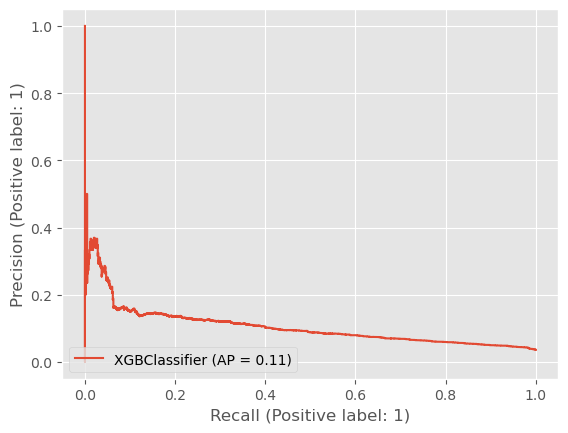

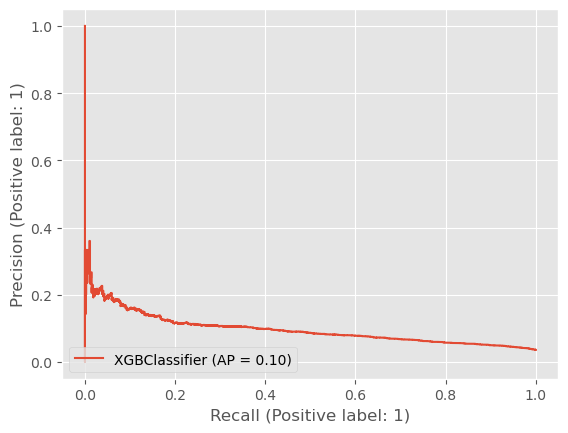

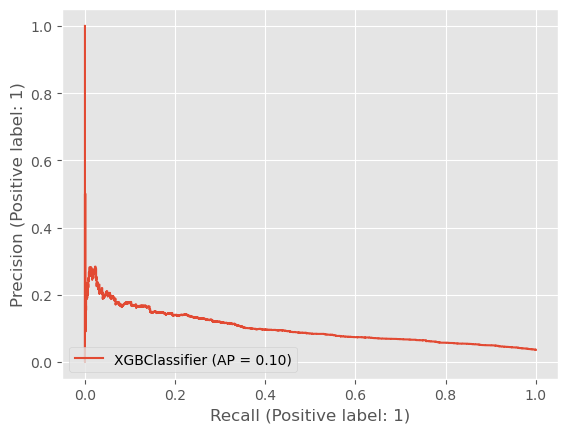

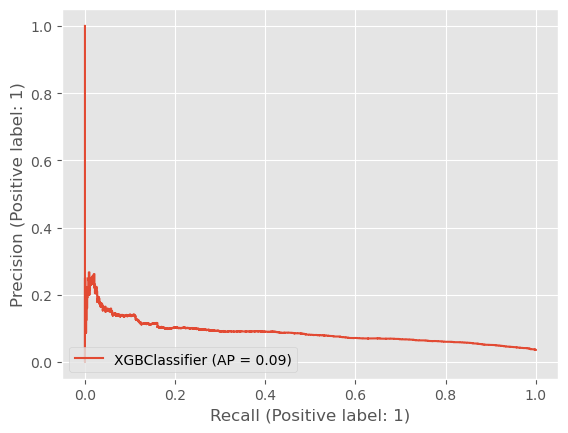

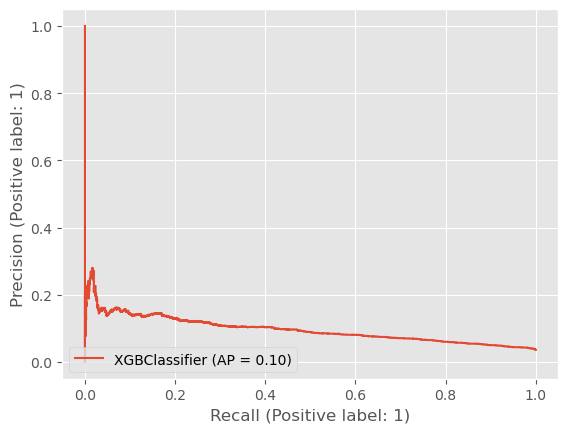

In [233]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import PrecisionRecallDisplay


sgkf = StratifiedKFold()

trained_models = []

for i, (train_idx, valid_idx) in enumerate(sgkf.split(X, y)):
    X_train = X.iloc[train_idx]
    X_valid = X.iloc[valid_idx]

    y_train = y.iloc[train_idx]
    y_valid = y.iloc[valid_idx]

    # Imputation
    imp = SimpleImputer()
    imp_X_train = pd.DataFrame(imp.fit_transform(X_train))
    imp_X_valid = pd.DataFrame(imp.transform(X_valid))

    # Imputation removed column names; put them back
    imp_X_train.columns = X_train.columns
    imp_X_valid.columns = X_valid.columns

    bst = XGBClassifier(n_estimators=1000, early_stopping_rounds=20)

    bst.fit(
        imp_X_train,
        y_train,
        eval_set=[(imp_X_train, y_train), (imp_X_valid, y_valid)],
        verbose=50,
    )

    trained_models.append(bst)

    PrecisionRecallDisplay.from_estimator(
        bst, imp_X_valid, y_valid, name="XGBClassifier"
    )


<Axes: >

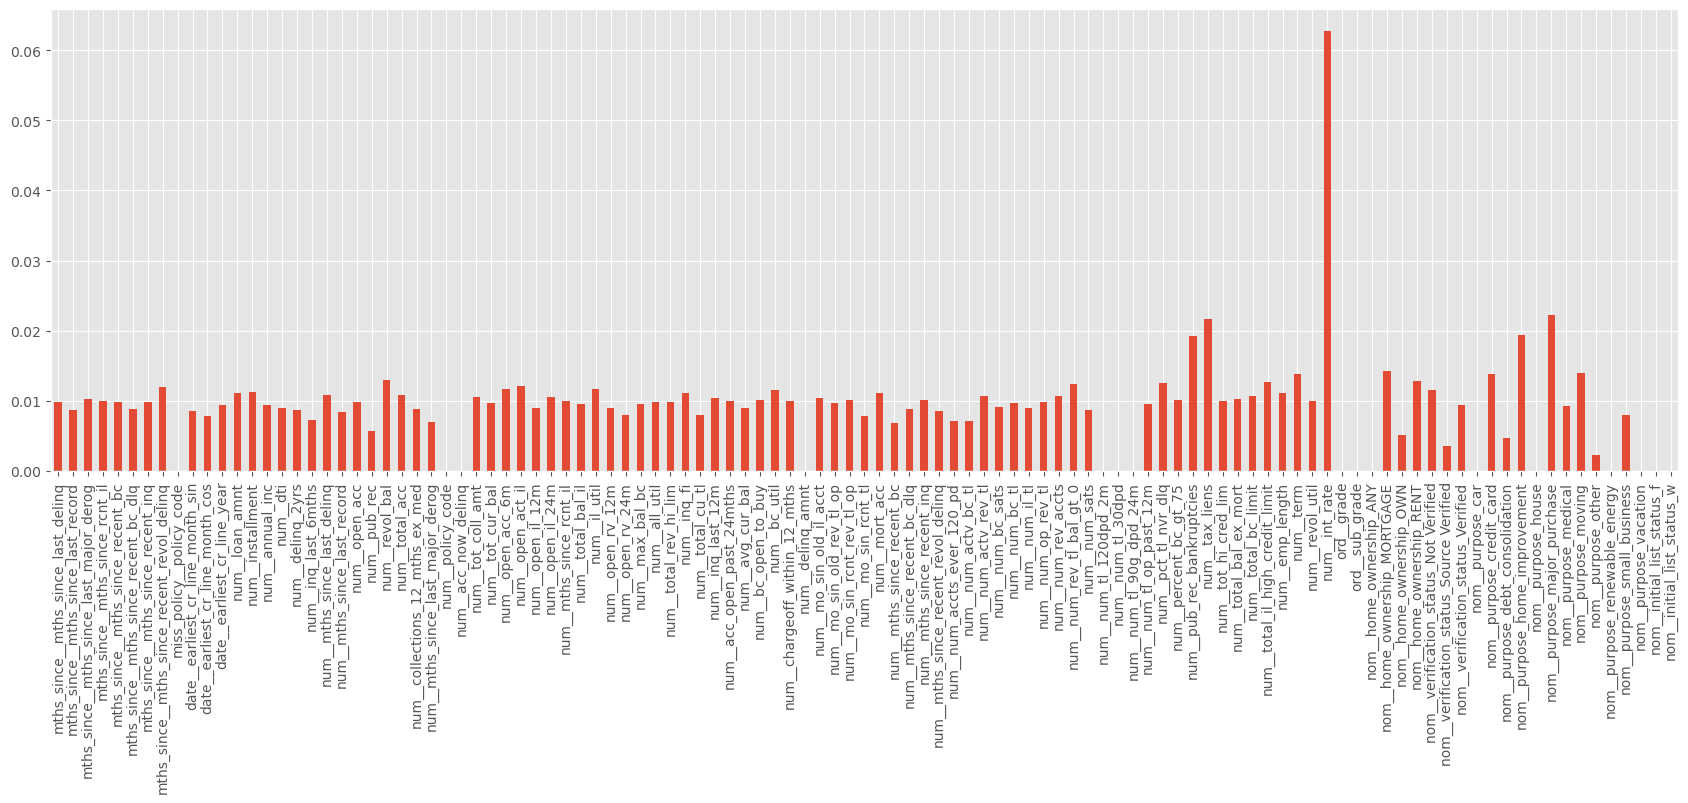

In [234]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(21, 6))

model = trained_models[0]

importances = model.feature_importances_

imp_series = pd.Series(importances, index=X_train.columns)

imp_series.plot.bar(ax=ax)
